<a href="https://colab.research.google.com/github/hemang03/clustering/blob/master/country_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Country-data.csv')

In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
df.drop(columns=['country', 'child_mort', 'exports',  'imports',
       'inflation', 'life_expec', 'total_fer', 'gdpp'] , inplace =True)

In [ ]:
X =df

In [ ]:
X

,health,income
0,7.58,1610
1,6.55,9930
2,4.17,12900
3,2.85,5900
4,6.03,19100
...,...,...
162,5.25,2950
163,4.91,16500
164,6.84,4490
165,5.18,4480


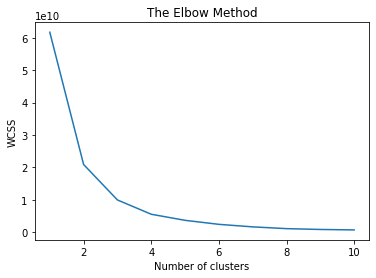

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
predict =y_kmeans = kmeans.fit_predict(X)

In [ ]:
predict

array([2, 2, 0, 2, 0, 0, 2, 3, 3, 0, 0, 3, 2, 0, 0, 3, 2, 2, 2, 2, 2, 0,
       0, 1, 0, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 3, 3,
       3, 0, 2, 2, 2, 3, 2, 0, 2, 3, 3, 0, 2, 2, 3, 2, 3, 0, 2, 2, 2, 2,
       2, 0, 3, 2, 2, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2,
       2, 3, 0, 1, 0, 2, 2, 0, 2, 2, 3, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 1, 3, 2, 0, 2, 2, 2, 0, 3, 4, 0, 0, 2, 2, 3, 2, 0, 0,
       2, 1, 0, 3, 2, 0, 3, 3, 2, 2, 2, 0, 3, 1, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 3, 3, 0, 2, 2, 0, 2, 2, 2], dtype=int32)

In [ ]:
df['cluster'] = predict

In [ ]:
df.head()

,health,income,cluster
0,7.58,1610,2
1,6.55,9930,2
2,4.17,12900,0
3,2.85,5900,2
4,6.03,19100,0


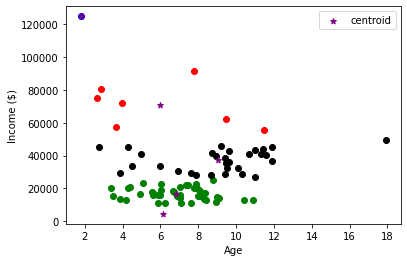

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df3 = df[df.cluster ==3]
df4 = df[df.cluster ==4]
df5 = df[df.cluster ==5]
plt.scatter(df1.health,df1['income'],color='green')
plt.scatter(df2.health,df2['income'],color='red')
plt.scatter(df3.health,df3['income'],color='black')
plt.scatter(df4.health , df4['income'] , color ='blue')
plt.scatter(df5.health , df5['income'] , color ='yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()